1.Dataset Definition

In [72]:
import pandas as pd

train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [73]:
train.head(10)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [74]:
#Survived' column is missing in the test dataset
test.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [75]:
print(train.shape)
print(test.shape)

(891, 12)
(418, 11)


In [76]:
# train_dataset summary
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [77]:
# 'Age','Cabin','Embarked' columns are null values
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [78]:
# test_dataset summary
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [79]:
# 'Age','Fare',Cabin',columns are null values
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

Data Visualization

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns


In [81]:
def visualization(variable):
    survived=train[train['Survived']==1][variable].value_counts()
    dead=train[train['Survived']==0][variable].value_counts()
    survived_rate=(survived/(survived+dead))*100
    df=pd.DataFrame([survived,dead])
    df.index=['Survived','Dead']
    print(df)
    print(survived_rate)
    df.plot(kind='bar',stacked=True,figsize=(10,5))

            1    3   2
Survived  136  119  87
Dead       80  372  97
1    62.962963
2    47.282609
3    24.236253
Name: Pclass, dtype: float64


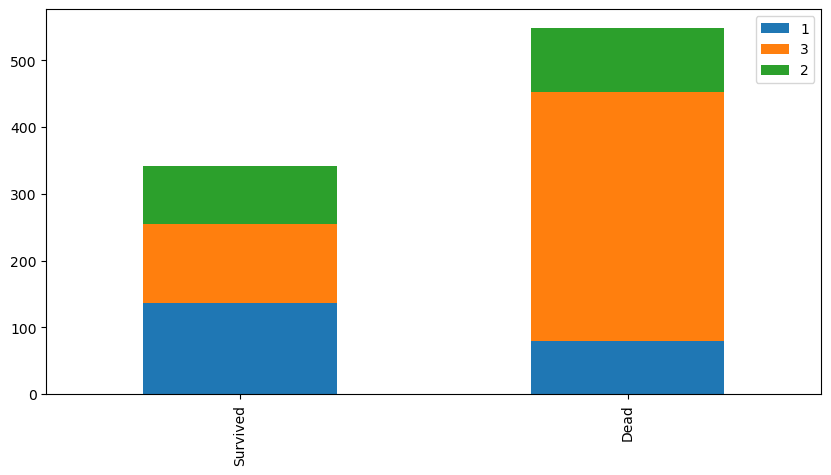

In [82]:
# Survival rates are higher among '1 'group
visualization('Pclass')


          female  male
Survived     233   109
Dead          81   468
female    74.203822
male      18.890815
Name: Sex, dtype: float64


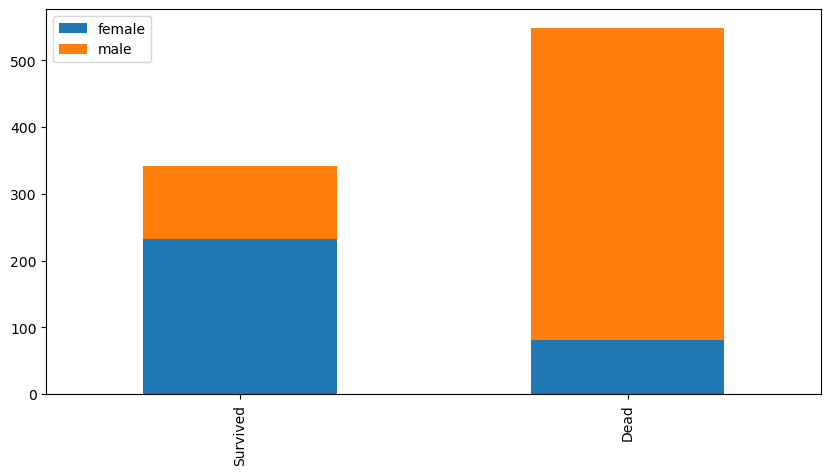

In [83]:
# Survival rates are higher among 'female'group
visualization('Sex')

              0      1     2     3     4    8    5
Survived  210.0  112.0  13.0   4.0   3.0  NaN  NaN
Dead      398.0   97.0  15.0  12.0  15.0  7.0  5.0
0    34.539474
1    53.588517
2    46.428571
3    25.000000
4    16.666667
5          NaN
8          NaN
Name: SibSp, dtype: float64


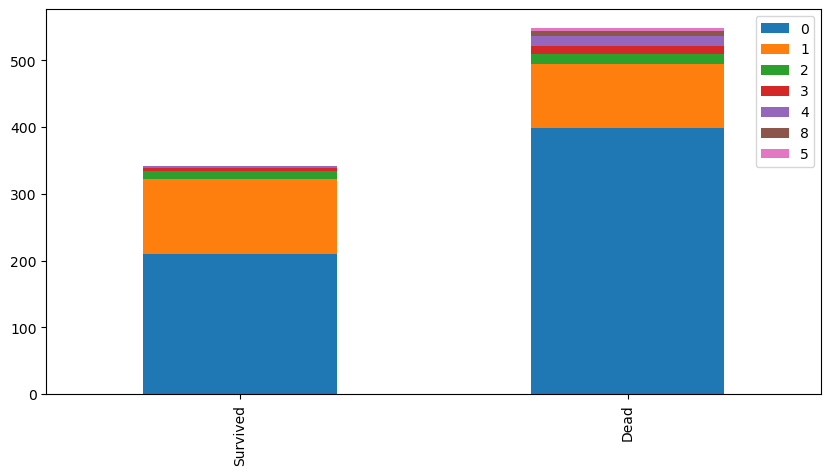

In [84]:
# Survival rates are higher among '1'group
visualization('SibSp')

              0     1     2    3    5    4    6
Survived  233.0  65.0  40.0  3.0  1.0  NaN  NaN
Dead      445.0  53.0  40.0  2.0  4.0  4.0  1.0
0    34.365782
1    55.084746
2    50.000000
3    60.000000
4          NaN
5    20.000000
6          NaN
Name: Parch, dtype: float64


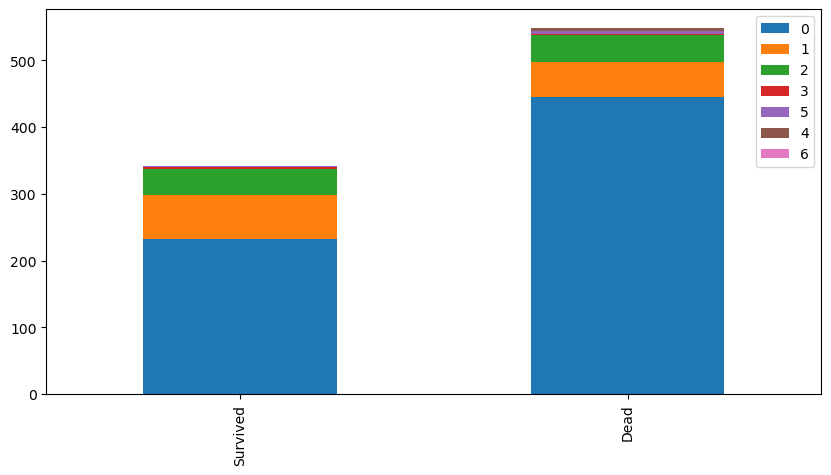

In [85]:
# Survival rates are higher among '1,2,3'group
visualization('Parch')

            S   C   Q
Survived  217  93  30
Dead      427  75  47
S    33.695652
C    55.357143
Q    38.961039
Name: Embarked, dtype: float64


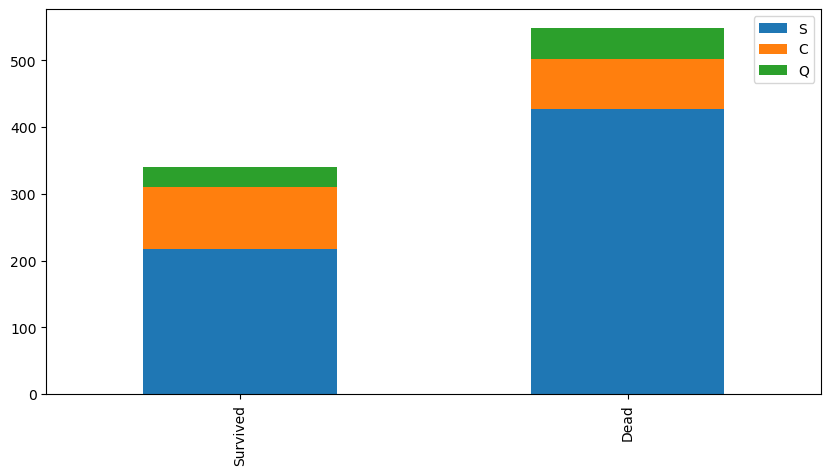

In [86]:
# Survival rates are higher among 'C'group
visualization('Embarked')

Feature Engineering

In [87]:
# Name
train_test_data=[train,test]
for dataset in train_test_data:
    dataset['Title']=dataset['Name'].str.extract(' ([A-Za-z]+)\.',expand=False)

In [88]:
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: Title, dtype: int64

In [89]:
test['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: Title, dtype: int64

In [90]:
# Title mapping
title_mapping = {"Mr": 0, "Miss": 1, "Mrs": 2, 
                 "Master": 3, "Dr": 3, "Rev": 3, "Col": 3, "Major": 3, "Mlle": 3,"Countess": 3,
                 "Ms": 3, "Lady": 3, "Jonkheer": 3, "Don": 3, "Dona" : 3, "Mme": 3,"Capt": 3,"Sir": 3 }
for dataset in train_test_data:
    dataset['Title'] = dataset['Title'].map(title_mapping)

Mr: 0   Miss:1   Mrs:2   Others:3 

            1   2    0   3
Survived  127  99   81  35
Dead       55  26  436  32
0    15.667311
1    69.780220
2    79.200000
3    52.238806
Name: Title, dtype: float64


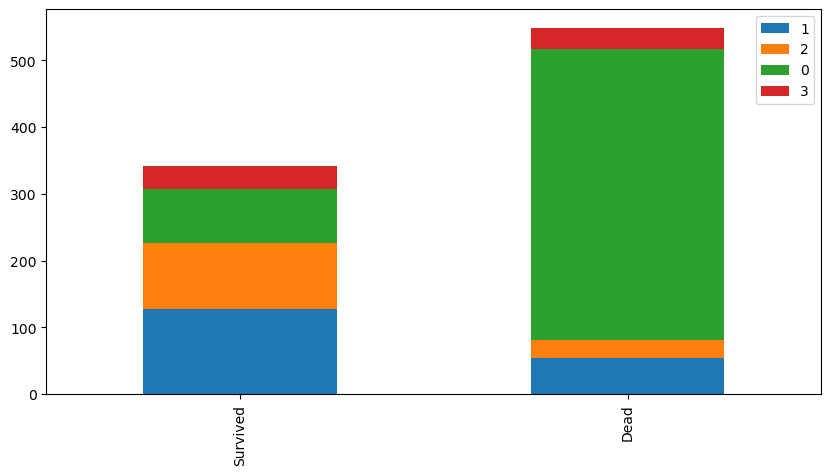

In [91]:
visualization('Title')

In [92]:
train.drop('Name',axis=1,inplace=True)
test.drop('Name',axis=1,inplace=True)

In [93]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,0


In [94]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,female,47.0,1,0,363272,7.0000,NaN,S,2
2,894,2,male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,female,22.0,1,1,3101298,12.2875,NaN,S,2


In [95]:
# Sex mapping
sex_mapping={"male":0,"female":1}
for dataset in train_test_data:
    dataset['Sex']=dataset['Sex'].map(sex_mapping)

male:0   female:1

            1    0
Survived  233  109
Dead       81  468
0    18.890815
1    74.203822
Name: Sex, dtype: float64


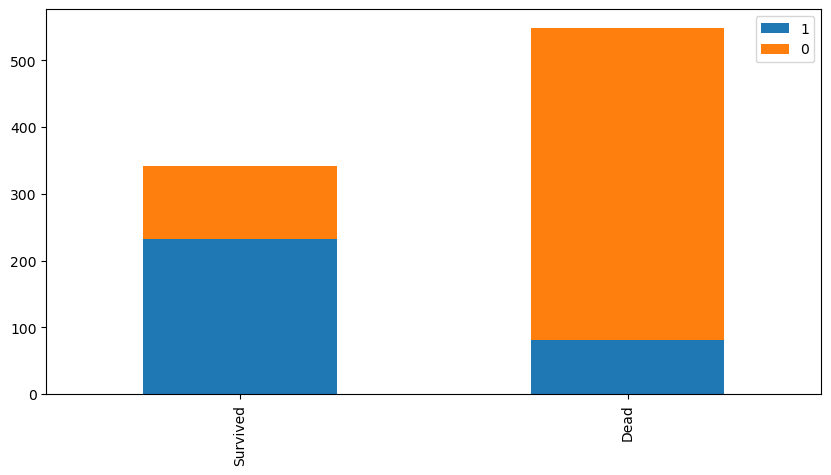

In [96]:
visualization('Sex')

In [97]:
train.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,0
5,6,0,3,0,NaN,0,0,330877,8.4583,NaN,Q,0
6,7,0,1,0,54.0,0,0,17463,51.8625,E46,S,0
7,8,0,3,0,2.0,3,1,349909,21.0750,NaN,S,3
8,9,1,3,1,27.0,0,2,347742,11.1333,NaN,S,2
9,10,1,2,1,14.0,1,0,237736,30.0708,NaN,C,2


In [98]:
# Age mapping(But, The age data contains missing values.)
train["Age"].fillna(train.groupby(['Title','Pclass','Embarked'])['Age'].transform('median'),inplace=True)

test["Age"].fillna(test.groupby(['Title','Pclass','Embarked'])['Age'].transform('median'),inplace=True)

                                   

In [99]:
train.head(30)
train.groupby(['Title','Pclass','Embarked'])['Age'].transform('median')

0      26.0
1      44.0
2      19.0
3      39.0
4      26.0
       ... 
886    15.5
887    23.0
888    19.0
889    36.0
890    31.5
Name: Age, Length: 891, dtype: float64

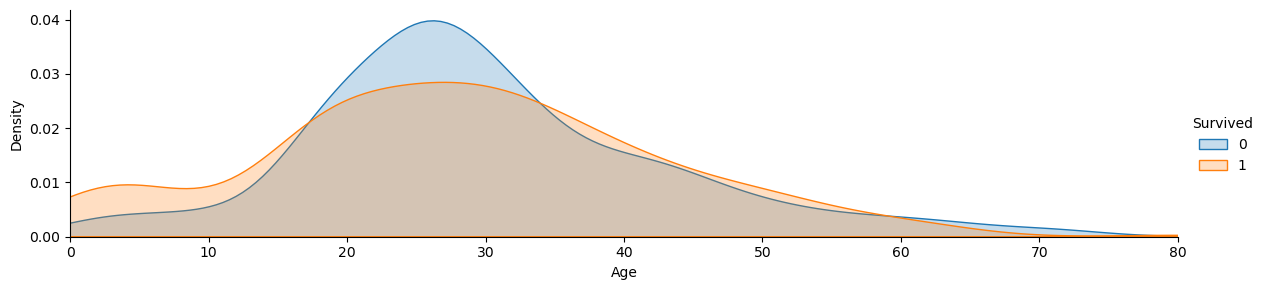

In [100]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',fill= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
 
plt.show() 

In [101]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
 11  Title        891 non-null    int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 83.7+ KB


In [102]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int64  
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Ticket       418 non-null    object 
 7   Fare         417 non-null    float64
 8   Cabin        91 non-null     object 
 9   Embarked     418 non-null    object 
 10  Title        418 non-null    int64  
dtypes: float64(2), int64(6), object(3)
memory usage: 36.1+ KB


In [103]:
#age mapping
for dataset in train_test_data:
    dataset.loc[ dataset['Age'] <= 10, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 10) & (dataset['Age'] <= 30), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 30) & (dataset['Age'] <= 50), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 50) & (dataset['Age'] <= 60), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 60, 'Age'] = 4

In [104]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,2.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,S,0


          1.0  2.0  0.0  3.0  4.0
Survived  158  122   40   17    5
Dead      294  185   28   25   17
1.0    34.955752
2.0    39.739414
0.0    58.823529
3.0    40.476190
4.0    22.727273
Name: Age, dtype: float64


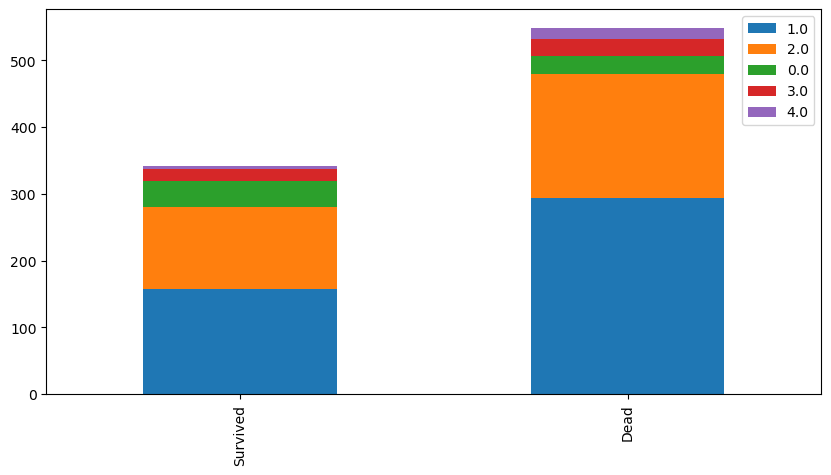

In [105]:
visualization('Age')

<Axes: >

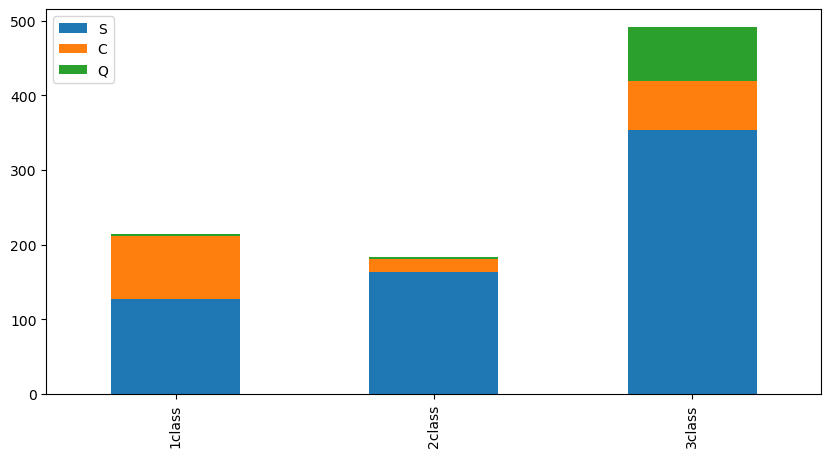

In [106]:
Pclass1 = train[train['Pclass']==1]['Embarked'].value_counts()
Pclass2 = train[train['Pclass']==2]['Embarked'].value_counts()
Pclass3 = train[train['Pclass']==3]['Embarked'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1class','2class', '3class']
df.plot(kind='bar',stacked=True, figsize=(10,5))

In [107]:
# most data -> S
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')

In [108]:
embarked_mapping={"S":0,"C":1,"Q":2}
for dataset in train_test_data:
    dataset['Embarked']=dataset['Embarked'].map(embarked_mapping)

In [109]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,0,0
1,2,1,1,1,2.0,1,0,PC 17599,71.2833,C85,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,0,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,0,0


In [110]:
# fare mapping
train["Fare"].fillna(train.groupby(['Pclass','Embarked'])["Fare"].transform("median"),inplace=True)
test["Fare"].fillna(test.groupby(['Pclass','Embarked'])["Fare"].transform("median"),inplace=True)

In [111]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,0,0
1,2,1,1,1,2.0,1,0,PC 17599,71.2833,C85,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,0,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,0,0


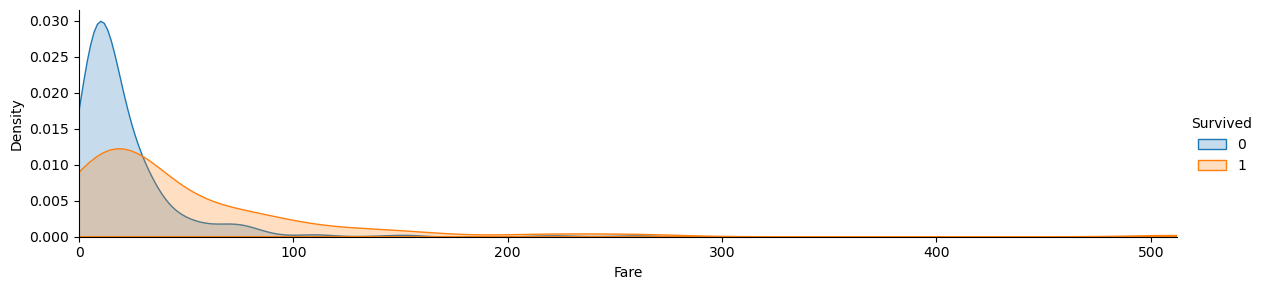

In [112]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Fare',fill= True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()
 
plt.show()

(50.0, 100.0)

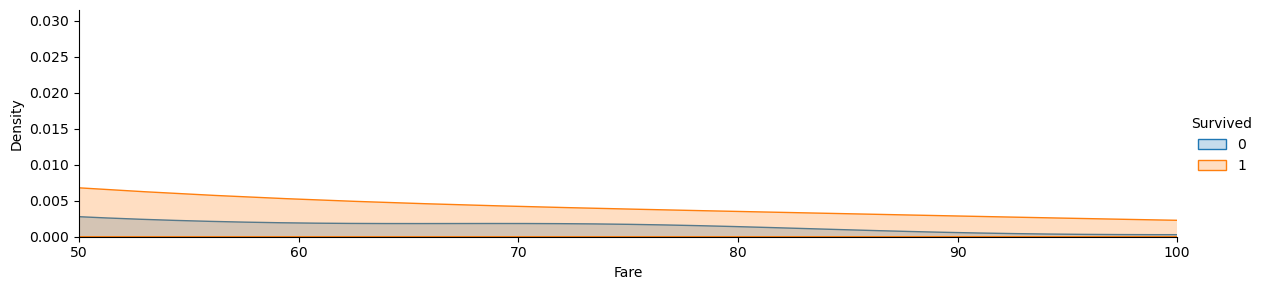

In [113]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Fare',fill= True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()
 
plt.xlim(50,100)

In [114]:
for dataset in train_test_data:
    dataset.loc[ dataset['Fare'] <=30, 'Fare']=0
    dataset.loc[(dataset['Fare']>30) & (dataset['Fare']<=60),'Fare']=1
    dataset.loc[(dataset['Fare']>60) & (dataset['Fare']<=100),'Fare']=2
    dataset.loc[dataset['Fare']>100,'Fare']=3

In [115]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,NaN,0,0
1,2,1,1,1,2.0,1,0,PC 17599,2.0,C85,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,NaN,0,1
3,4,1,1,1,2.0,1,0,113803,1.0,C123,0,2
4,5,0,3,0,2.0,0,0,373450,0.0,NaN,0,0


In [116]:
# cabin mapping
train.Cabin.value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

In [117]:
for dataset in train_test_data:
    dataset['Cabin']=dataset['Cabin'].str[:1]

           C     B     D     E     A    T    F    G
1class  59.0  47.0  29.0  25.0  15.0  1.0  NaN  NaN
2class   NaN   NaN   4.0   4.0   NaN  NaN  8.0  NaN
3class   NaN   NaN   NaN   3.0   NaN  NaN  5.0  4.0


<Axes: >

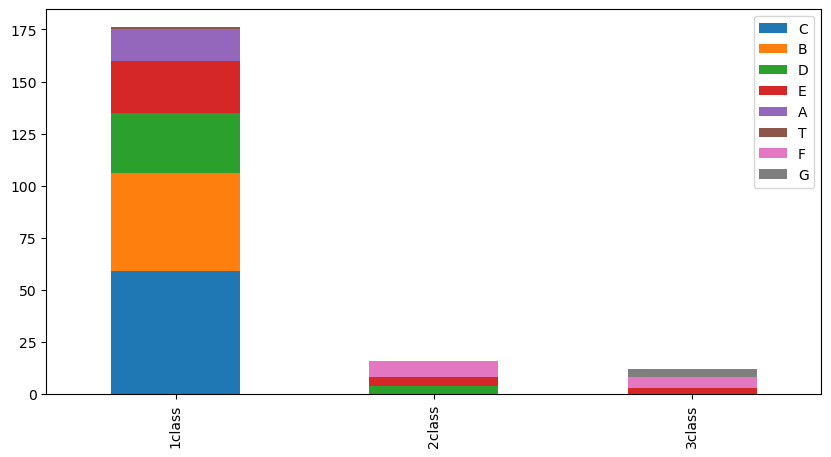

In [118]:
Pclass1=train[train['Pclass']==1]['Cabin'].value_counts()
Pclass2=train[train['Pclass']==2]['Cabin'].value_counts()
Pclass3=train[train['Pclass']==3]['Cabin'].value_counts()
df=pd.DataFrame([Pclass1,Pclass2,Pclass3])
df.index=['1class','2class','3class']
print(df)
df.plot(kind='bar',stacked=True,figsize=(10,5))

In [119]:
# Cabin mapping
cabin_mapping = {"A": 0, "B": 0.4, "C": 0.8, "D": 1.2, "E": 1.6, "F": 2, "G": 2.4, "T": 2.8}
for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].map(cabin_mapping)

In [120]:
#cabin mapping(But, The cabin data contains missing values.)
train["Cabin"].fillna(train.groupby("Pclass")["Cabin"].transform("median"), inplace=True)
test["Cabin"].fillna(test.groupby("Pclass")["Cabin"].transform("median"), inplace=True)

In [121]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,2.0,0,0
1,2,1,1,1,2.0,1,0,PC 17599,2.0,0.8,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,2.0,0,1
3,4,1,1,1,2.0,1,0,113803,1.0,0.8,0,2
4,5,0,3,0,2.0,0,0,373450,0.0,2.0,0,0


In [122]:
# sibsp mapping
sibsp_mapping={0:0,1:0.4,2:0.8,3:1.2,4:1.6,5:2.0,8:2.4}
for dataset in train_test_data:
    dataset['SibSp']=dataset['SibSp'].map(sibsp_mapping)

In [123]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,0.4,0,A/5 21171,0.0,2.0,0,0
1,2,1,1,1,2.0,0.4,0,PC 17599,2.0,0.8,1,2
2,3,1,3,1,1.0,0.0,0,STON/O2. 3101282,0.0,2.0,0,1
3,4,1,1,1,2.0,0.4,0,113803,1.0,0.8,0,2
4,5,0,3,0,2.0,0.0,0,373450,0.0,2.0,0,0


In [124]:
# parch mapping
parch_mapping={0:0,1:0.4,2:0.8,3:1.2,4:1.6,5:2.0,6:2.4,9:2.8}
for dataset in train_test_data:
    dataset['Parch']=dataset['Parch'].map(parch_mapping)

In [125]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,0.4,0.0,A/5 21171,0.0,2.0,0,0
1,2,1,1,1,2.0,0.4,0.0,PC 17599,2.0,0.8,1,2
2,3,1,3,1,1.0,0.0,0.0,STON/O2. 3101282,0.0,2.0,0,1
3,4,1,1,1,2.0,0.4,0.0,113803,1.0,0.8,0,2
4,5,0,3,0,2.0,0.0,0.0,373450,0.0,2.0,0,0


In [126]:
# Removing unnecessary features
train=train.drop(['Ticket'],axis=1)
test=test.drop(['Ticket'],axis=1)
train = train.drop(['PassengerId'], axis=1)

In [127]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
0,0,3,0,1.0,0.4,0.0,0.0,2.0,0,0
1,1,1,1,2.0,0.4,0.0,2.0,0.8,1,2
2,1,3,1,1.0,0.0,0.0,0.0,2.0,0,1
3,1,1,1,2.0,0.4,0.0,1.0,0.8,0,2
4,0,3,0,2.0,0.0,0.0,0.0,2.0,0,0


In [128]:
train_data=train.drop('Survived',axis=1)
target=train['Survived']

print(train_data.shape)
print(target.shape)

(891, 9)
(891,)


In [129]:
train_data.head(10)

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
0,3,0,1.0,0.4,0.0,0.0,2.0,0,0
1,1,1,2.0,0.4,0.0,2.0,0.8,1,2
2,3,1,1.0,0.0,0.0,0.0,2.0,0,1
3,1,1,2.0,0.4,0.0,1.0,0.8,0,2
4,3,0,2.0,0.0,0.0,0.0,2.0,0,0
5,3,0,2.0,0.0,0.0,0.0,2.0,2,0
6,1,0,3.0,0.0,0.0,1.0,1.6,0,0
7,3,0,0.0,1.2,0.4,0.0,2.0,0,3
8,3,1,1.0,0.0,0.8,0.0,2.0,0,2
9,2,1,1.0,0.4,0.0,1.0,1.8,1,2


In [130]:
# Import Classifier Modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import numpy as np

In [131]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    float64
 5   Parch     891 non-null    float64
 6   Fare      891 non-null    float64
 7   Cabin     891 non-null    float64
 8   Embarked  891 non-null    int64  
 9   Title     891 non-null    int64  
dtypes: float64(5), int64(5)
memory usage: 69.7 KB


In [132]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [145]:
clf = KNeighborsClassifier(n_neighbors = 12)
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.82222222 0.79775281 0.80898876 0.82022472 0.87640449 0.82022472
 0.82022472 0.80898876 0.84269663 0.84269663]


In [146]:
round(np.mean(score)*100, 2)

82.6

In [147]:
clf = DecisionTreeClassifier()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.8        0.84269663 0.76404494 0.80898876 0.79775281 0.82022472
 0.79775281 0.83146067 0.74157303 0.7752809 ]


In [148]:
# decision tree Score
round(np.mean(score)*100, 2)

79.8

In [155]:
clf = RandomForestClassifier(n_estimators=11)
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.85555556 0.83146067 0.79775281 0.82022472 0.84269663 0.80898876
 0.82022472 0.79775281 0.76404494 0.78651685]


In [156]:
# Random Forest Score
round(np.mean(score)*100, 2)

81.25

In [157]:
clf = GaussianNB()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.81111111 0.71910112 0.75280899 0.71910112 0.73033708 0.80898876
 0.76404494 0.79775281 0.83146067 0.82022472]


In [158]:
# Naive Bayes Score
round(np.mean(score)*100, 2)

77.55

In [159]:
clf = SVC()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.82222222 0.78651685 0.82022472 0.80898876 0.84269663 0.79775281
 0.83146067 0.85393258 0.83146067 0.83146067]


In [160]:
round(np.mean(score)*100,2)

82.27

In [164]:
# test1 (SVM)
clf = SVC()
clf.fit(train_data, target)

test_data = test.drop("PassengerId", axis=1).copy()
prediction = clf.predict(test_data)

In [165]:
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": prediction
    })

submission.to_csv('submission3.csv', index=False)

In [166]:
submission = pd.read_csv('submission3.csv')
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [167]:
# test2 (KNN)
clf = KNeighborsClassifier(n_neighbors = 12)
clf.fit(train_data, target)

test_data = test.drop("PassengerId", axis=1).copy()
prediction = clf.predict(test_data)

In [168]:
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": prediction
    })

submission.to_csv('submission4.csv', index=False)

In [169]:
ubmission = pd.read_csv('submission4.csv')
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
